In [3]:
from drivecycle import route, trajectory, utils, plots, graph, energy

import matplotlib.pyplot as plt
import networkx as nx

import requests
import polyline
import json
import pandas as pd
import numpy as np
import requests

import pickle

In [4]:
onestop_id = "r-c3nf-1-c12855-5e7044"
#onestop_id = "r-c3nf-1-e7bd55-0f6fa9"
valhalla_host = "http://localhost:8002"
api_key = 'SN0N9PZyDIDrOf9tcm3DS1t8sbqZi1Ul'

In [5]:
url = f"http://transit.land/api/v1/route_stop_patterns.geojson?onestop_id={onestop_id}"

r = requests.get(url,headers={'apikey':api_key},timeout=(3.05, 10)).json()

stops = r["features"][0]["properties"]["stop_distances"]
stops = [i for i in stops if i!=0]

coords = [tuple((i[1],i[0])) for i in r["features"][0]["geometry"]["coordinates"]]

b = polyline.encode(coords, 6)

data =json.dumps({
    "encoded_polyline":b,
    "costing":"auto",
    "filters":
        {
            "attributes":[
                "edge.way_id",
                "edge.names",
                "edge.length",
                "edge.speed",
                "node.intersecting_edge.road_class",
                "node.intersecting_edge.begin_heading",
                "node.elapsed_time","node.type"
                ],
            "action":"include"
        }
    })

height_data = json.dumps({"encoded_polyline":b,"range":True})

In [6]:
trace = requests.post(f"{valhalla_host}/trace_attributes", data=data)
height = requests.post(f"{valhalla_host}/height", data=height_data)

In [7]:
edges = trace.json()["edges"]

data_ = []

for edge in edges:
    length = edge["length"]*1000
    speed = edge["speed"]
    way_id = edge["way_id"]
    try:
        intersect = [edge["end_node"]["intersecting_edges"][0]["road_class"]]
    except:
        intersect = [None]

    item = {
        "way_id":way_id,
        "length":length,
        "speed":speed,
        "intersection":intersect,
    }
    data_.append(item)

In [8]:
edges


[{'end_node': {'type': 'street_intersection',
   'elapsed_time': 0.718,
   'intersecting_edges': [{'road_class': 'service_other',
     'begin_heading': 92}]},
  'length': 0.008,
  'names': ['Penbrooke Drive SE'],
  'speed': 40,
  'way_id': 140445190},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 9.346,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 270}]},
  'length': 0.129,
  'names': ['Penbrooke Drive SE'],
  'speed': 40,
  'way_id': 200444853},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 22.504,
   'intersecting_edges': [{'road_class': 'residential', 'begin_heading': 89}]},
  'length': 0.146,
  'names': ['Penbrooke Drive SE'],
  'speed': 40,
  'way_id': 200444853},
 {'end_node': {'type': 'street_intersection',
   'elapsed_time': 29.544,
   'intersecting_edges': [{'road_class': 'residential',
     'begin_heading': 270}]},
  'length': 0.078,
  'names': ['Penbrooke Drive SE'],
  'speed': 40,
  'way_id': 200444853},

In [9]:
len(data_)

346

In [10]:
data_

[{'way_id': 140445190,
  'length': 8.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 200444853,
  'length': 129.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 200444853,
  'length': 146.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 200444853,
  'length': 78.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199225894,
  'length': 183.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199225894,
  'length': 14.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199225894,
  'length': 115.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199225894,
  'length': 7.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199225894,
  'length': 118.0,
  'speed': 40,
  'intersection': ['residential']},
 {'way_id': 199225894,
  'length': 8.0,
  'speed': 40,
  'intersection': ['service_other']},
 {'way_id': 199225894,
  'length': 117.0,
  'speed': 40,
  'intersecti

In [11]:
a = graph.Graph(data_)
a.include_stops(stops)
a.consolidate_intersections()
a.simplify_graph()

In [12]:
stop={"bus_stop":30,"tertiary":10}
dc = route.sequential(a.get_edges(),stops=stop, stop_at_node=True, step=1)

INFO:root:Could not complete segment: ti: 759.00, tf: 2.28,  vi: 16.67 , vf: 0.00,                                 v_target:16.67, length: 38.00
INFO:root:Vi: 0.00. Reducing vf to 15.00 and v_target to 15.00 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 13.50 and v_target to 13.50 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 12.15 and v_target to 12.15 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 10.94 and v_target to 10.94 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 9.84 and v_target to 9.84 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 8.86 and v_target to 8.86 at time 827.28 and segment length 33.5
INFO:root:Vi: 0.00. Reducing vf to 7.97 and v_target to 7.97 at time 827.28 and segment length 33.5
INFO:root:Could not complete segment: ti: 901.28, tf: 6.40,  vi: 13.76 , vf: 0.00,                                 v_target:13.61, length: 88.10
IN

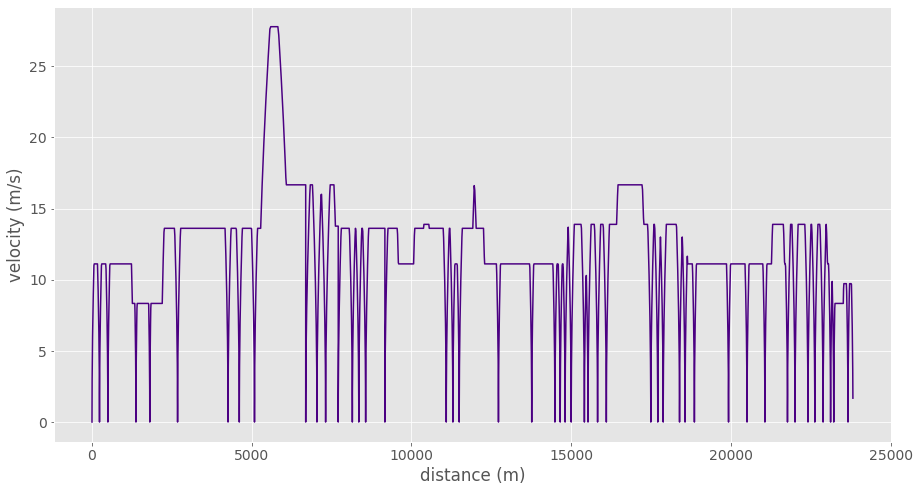

In [13]:
plots.plot_vd(dc,"route_drivecycle.png")

In [14]:
len(a.get_edges())

125

In [15]:
dc

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00000000e+00, 5.00000000e-01],
       [2.00000000e+00, 2.00000000e+00, 2.00000000e+00],
       ...,
       [3.12859316e+03, 3.67536508e+00, 2.38173817e+04],
       [3.12959316e+03, 2.67536508e+00, 2.38205570e+04],
       [3.13059316e+03, 1.67536508e+00, 2.38227324e+04]])

In [16]:
power = energy.energy_model(dc,m=15000, area=8.5, capacity=555)


final = np.c_[dc, power[:,4]]

In [17]:
power

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  5.00000000e-01,
         1.93858567e+01,  9.99990297e-01],
       [ 2.00000000e+00,  2.00000000e+00,  2.00000000e+00,
         3.88557223e+01,  9.99970850e-01],
       ...,
       [ 3.12859316e+03,  3.67536508e+00,  2.38173817e+04,
        -3.19817037e+01,  9.49258232e-01],
       [ 3.12959316e+03,  2.67536508e+00,  2.38205570e+04,
        -2.33691798e+01,  9.49269928e-01],
       [ 3.13059316e+03,  1.67536508e+00,  2.38227324e+04,
        -1.46777285e+01,  9.49277275e-01]])

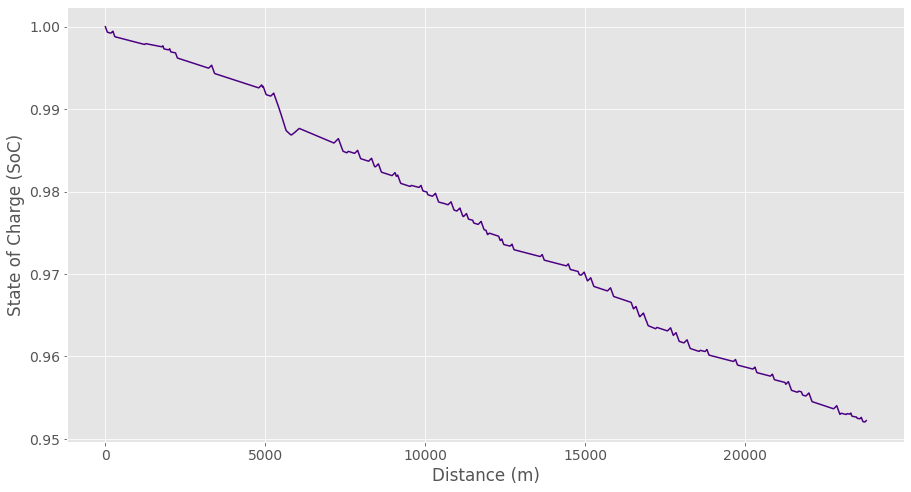

SoC: 0.9522112340106867


In [26]:
t=[i[2] for i in final]
p=[i[3] for i in final]

plt.figure(figsize=(15, 8))
plt.plot(t,p, color='#4b0082', linewidth=1.5)
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams.update({'font.size': 14})
plt.xlabel("Distance (m)")
plt.ylabel("State of Charge (SoC)")
plt.savefig("Soc_chart.png", transparent=False, bbox_inches='tight')
plt.show()

print(f"SoC: {power[-1,4]}")

<Figure size 432x288 with 0 Axes>